**Компромисс дисперсии и смещения**

В этом notebook я надеюсь подробно разобрать вопрос компромиса между смещением (bias) и дисперсией (variance) в машинном обучении.

Вдохновлено соотсветсвующим разделом в <a href="https://www.statlearning.com/">ISLR</a>.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Введение

Утверждается что средне квадратическую ошибку модели (Mean Square Error, MSE) можно разложить на три составляющие:
- Дисперсию;
- Квардрат смещения;
- Неустранимую ошибку.

Или записывая серез формулу:

$$\mathbb{E}(y_0 - \hat{f}(x_0))^2 = Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\varepsilon).$$

Где:
- $\hat{f}(x)$ - некоторая модель описывающая данные;
- $x_0$ - некоторое произвольное контрольное значение предикторов;
- $y_0$ - некоторое произвольное контрольное значение оклика;
- $\varepsilon$ - неустранимая ошибка модели (irreducible error); в нее вкладывается та информация о описываемом процессе, которой нет в полученной выборке;
- $Var(\hat{f}(x_0))$ - дисперсия полученной модели; эта величина должна быть тем большем, чем сильнее предстказания модели будут меняться от измениния выбоки;
- $Bias(\hat{f}(x_0))$ - смещение меодли эта величина тем меньше, чем точнее модель подогнанна к описываемому просцессу;
- $Var(\varepsilon)$ - дисперсия неустранимой ошибки; чем полнее и точнее наши данные, тем меньше эта величина;
- $\mathbb{E}(y_0 - \hat{f}(x_0))^2$ - математическое ожидание ошибки полученной модели.

В различных источниках к этой теме очень часто прикладывают график подобный этому:

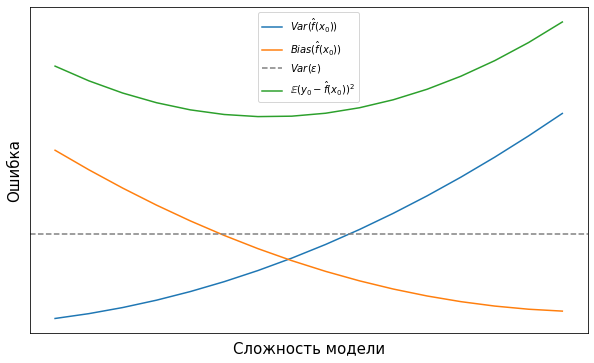

In [54]:
x_plot_range = np.arange(0,0.8, 0.05)
variance = 3*(x_plot_range)**2 + x_plot_range
bias = 3*(x_plot_range)**2 - 4.8*x_plot_range + 2
irrecible_error = 1
model_error = variance + bias + irrecible_error

plt.figure(figsize = [10, 6])
plt.plot(x_plot_range, variance)
plt.plot(x_plot_range, bias)
plt.axhline(irrecible_error, color = "gray", linestyle = "dashed")
plt.plot(x_plot_range, model_error)

plt.xticks([])
plt.yticks([])

plt.xlabel("Сложность модели", fontsize = 15)
plt.ylabel("Ошибка", fontsize = 15)

ans = plt.legend([
    "$Var(\hat{f}(x_0))$",
    "$Bias(\hat{f}(x_0))$",
    "$Var(\\varepsilon)$",
    "$\mathbb{E}(y_0 - \hat{f}(x_0))^2$"
])

Далее я на примере простой задачи регрессии попытаюсь провести такой вычислитеньный эксперимент, который приведет именно к такому графику.

# Описание примера

Пусть имеется некоторый закон распределения: